# League of Legends Champion Recommendation System

League of Legends (LoL) is a popular 5v5 Multiplayer Online Battle Arena (MOBA) where two teams of unique characters ("champions") fight to destroy the enemy's main base structure, the "Nexus," on a map called Summoner's Rift. Players earn gold and experience to buy items and level up abilities by killing computer-controlled minions, neutral monsters, and enemy champions, progressing from their base through lanes to destroy defensive towers and eventually the Nexus to win. It's a free-to-play, team-based strategy game requiring critical thinking, communication, and coordination to outplay opponents.

In League of Legends, the five core roles are Top, Jungle, Mid, ADC (Bot), and Support, each with unique responsibilities: Top Laners are durable solo fighters, Junglers roam the map taking objectives and ganking lanes, Mid Laners are high-damage mages/assassins, ADCs (Attack Damage Carries) are ranged damage dealers in bot lane, and Supports protect the ADC and provide vision/utility, forming a complete team with distinct strategic functions. 


# Import Required Libraries

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 6)

# Load and Explore Champion Data

In [98]:
# Load the champion data
champions_df = pd.read_csv('champions.csv')

# Display basic information
print("Champion Dataset Shape:", champions_df.shape)
print("\nFirst few rows:")
print(champions_df.head(10))
print("\nDataset Info:")
print(champions_df.info())
print("\nStatistical Summary:")
print(champions_df.describe())

Champion Dataset Shape: (149, 7)

First few rows:
  Champion Name     Role  Base Health  Base Mana  Base Armor  \
0        Aatrox      Top          580          0          38   
1          Ahri      Mid          526        418          21   
2         Akali      Mid          575        200          23   
3       Alistar  Support          600        350          44   
4         Amumu   Jungle          615        285          33   
5        Anivia      Mid          480        495          21   
6         Annie      Mid          524        418          19   
7          Ashe      ADC          570        280          26   
8  Aurelion Sol      Mid          575        350          19   
9          Azir      Mid          552        438          19   

   Base Attack Damage  Gold Efficiency  
0                  60             1.05  
1                  53             1.02  
2                  62             1.03  
3                  62             1.08  
4                  53             1.06  


Champions by Role:
Role
Mid        39
Top        37
Jungle     32
Support    22
ADC        19
Name: count, dtype: int64


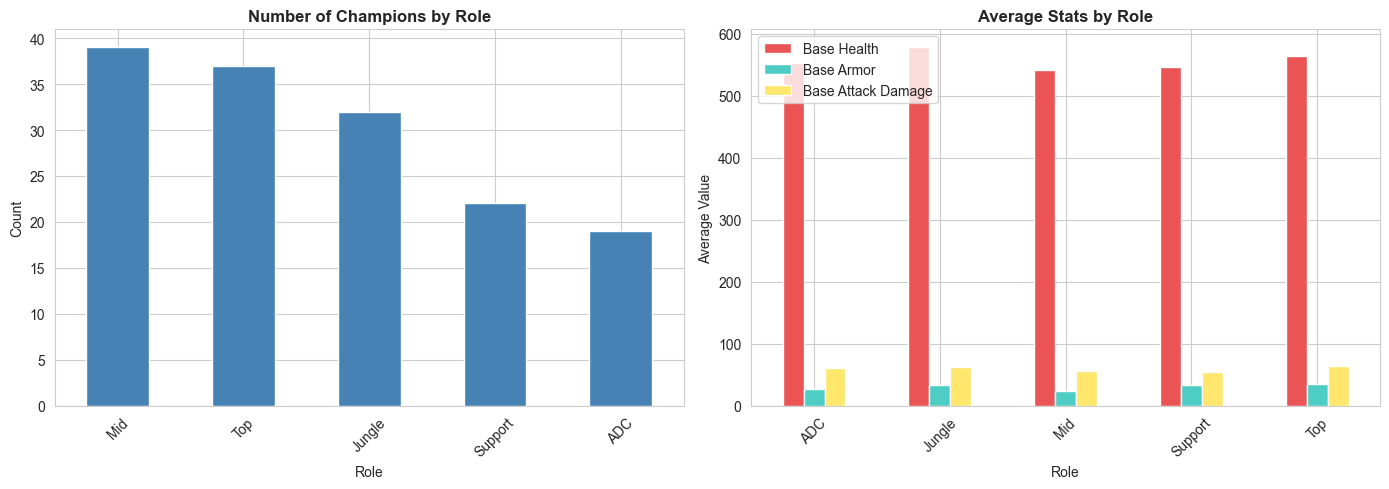

In [99]:
print("\nChampions by Role:")
print(champions_df['Role'].value_counts())

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

champions_df['Role'].value_counts().plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Number of Champions by Role', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Role')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Average stats by role
avg_stats = champions_df.groupby('Role')[['Base Health', 'Base Armor', 'Base Attack Damage']].mean()
avg_stats.plot(kind='bar', ax=axes[1], color=["#EB5454", '#4ECDC4', '#FFE66D'])
axes[1].set_title('Average Stats by Role', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Role')
axes[1].set_ylabel('Average Value')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(loc='upper left')

plt.tight_layout()
plt.show()

# Cosine cimilarity based recommendation

In [100]:
# Data Preprocessing
features = ['Base Health', 'Base Mana', 'Base Armor', 'Base Attack Damage', 'Gold Efficiency']
scaler = MinMaxScaler()
champions_scaled = scaler.fit_transform(champions_df[features])

In [101]:
# Recommendation System for League of Legends Champions (cosine similarity)

def cosine_similarity_manual(vec1, vec2):
    dot = np.dot(vec1, vec2)
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    return dot / (norm1 * norm2) if norm1 != 0 and norm2 != 0 else 0

def recommend_champions_by_cosine_similarity(user_role=None, health_pref=0.5, mana_pref=0.5, armor_pref=0.5, attack_pref=0.5, gold_pref=0.5, top_n=5) -> pd.DataFrame:
    """
    Recommend champions based on user preferences.
    
    Parameters:
    - user_role: str, optional (e.g., 'Mid', 'ADC', etc.)
    - health_pref, mana_pref, armor_pref, attack_pref, gold_pref: float between 0 and 1 (scaled preferences)
    - top_n: int, number of recommendations
    
    Returns:
    - DataFrame of recommended champions
    """
    user_scaled = np.array([health_pref, mana_pref, armor_pref, attack_pref, gold_pref])
    
    similarities = np.array([cosine_similarity_manual(user_scaled, champ) for champ in champions_scaled])
    
    if user_role:
        role_indices = champions_df[champions_df['Role'] == user_role].index
        similarities_filtered = similarities[role_indices]
        top_local_indices = np.argsort(similarities_filtered)[-top_n:][::-1]
        top_indices = role_indices[top_local_indices]
    else:
        top_indices = np.argsort(similarities)[-top_n:][::-1]
    
    recommendations = champions_df.iloc[top_indices].copy()
    recommendations['Similarity Score'] = similarities[top_indices]
    return pd.DataFrame(recommendations[['Champion Name', 'Role', 'Similarity Score']])

def test_recommend_champions_by_cosine_similarity():
    display(recommend_champions_by_cosine_similarity(user_role='Mid', health_pref=0.6, mana_pref=0.8, top_n=5))
    print("------------------------------")
    display(recommend_champions_by_cosine_similarity(user_role = 'ADC', health_pref=0.4, mana_pref=0.3, armor_pref=0.5, attack_pref=0.9, gold_pref=0.7, top_n=5))
    print("------------------------------")
    display(recommend_champions_by_cosine_similarity(health_pref=0.7, mana_pref=0.6, armor_pref=0.5, attack_pref=0.8, gold_pref=0.4, top_n=5))
test_recommend_champions_by_cosine_similarity()

,Champion Name,Role,Similarity Score
111,Sylas,Mid,0.965321
110,Swain,Mid,0.960693
30,Galio,Mid,0.958733
112,Syndra,Mid,0.954478
129,Vel'Koz,Mid,0.944678


------------------------------


,Champion Name,Role,Similarity Score
14,Caitlyn,ADC,0.955571
106,Sivir,ADC,0.941855
48,Kalista,ADC,0.927150
64,Lucian,ADC,0.919920
126,Varus,ADC,0.914110


------------------------------


,Champion Name,Role,Similarity Score
111,Sylas,Mid,0.991934
126,Varus,ADC,0.990019
105,Sion,Top,0.987361
97,Sejuani,Jungle,0.986725
35,Graves,Jungle,0.985823


### Scenario 1: Mid Lane Mage
- **User Preferences**: High mana (0.8), moderate health (0.6), Mid role.
- **Recommendations**: Sylas, Swain, Galio, Syndra, Vel'Koz - all Mid lane mages.
- **Champions are aggressive mid players designed to fight and deal damage to enemy fighters.**

### Scenario 2: ADC High Damage
- **User Preferences**: Low health (0.4), low mana (0.3), high attack damage (0.9), high gold efficiency (0.7), ADC role.
- **Recommendations**: Caitlyn, Sivir, Kalista, Lucian, Varus - all ADCs fighters.

### Scenario 3: Balanced Damage and Health
- **User Preferences**: Balanced across health (0.7), mana (0.6), armor (0.5), attack damage (0.8), gold efficiency (0.4), no role restriction.
- **Recommendations**: Sylas (Mid), Varus (ADC), Sion (Top), Sejuani (Jungle), Graves (Jungle).

# Pearson correlation based recommendation

In [103]:
""" Different approach using Pearson correlation to find similar champions. """

# Compute correlation matrix
correlation_matrix = np.corrcoef(champions_scaled.T)  # Correlation between features, but we need between champions
# For champions, compute pairwise correlations
champion_corr = np.corrcoef(champions_scaled)  # This gives correlation between rows (champions)

def recommend_champions_by_pearson(champion_name, top_n=5) -> pd.DataFrame:
    """
    Recommend champions similar to the given champion using Pearson correlation.
    
    Parameters:
    - champion_name: str, name of the champion
    - top_n: int, number of recommendations
    
    Returns:
    - DataFrame of recommended champions
    """
    if champion_name not in champions_df['Champion Name'].values:
        raise ValueError(f"Champion '{champion_name}' not found in the dataset.")
    
    champion_index = champions_df[champions_df['Champion Name'] == champion_name].index[0]
    correlations = champion_corr[champion_index]
    
    # Get top correlations, excluding self
    top_indices = np.argsort(correlations)[-top_n-1:-1][::-1]  # Highest correlations
    
    recommendations = champions_df.iloc[top_indices].copy()
    recommendations['Correlation Score'] = correlations[top_indices]
    return pd.DataFrame(recommendations[['Champion Name', 'Role', 'Correlation Score']])

def test_recommend_champions_by_pearson():
    display(recommend_champions_by_pearson('Ahri', top_n=5))
    print("------------------------------")
    display(recommend_champions_by_pearson('Jhin', top_n=5))
    print("------------------------------")
    display(recommend_champions_by_pearson('Volibear', top_n=5))
test_recommend_champions_by_pearson()

,Champion Name,Role,Correlation Score
77,Neeko,Mid,0.999608
9,Azir,Mid,0.997372
63,Lissandra,Mid,0.996191
145,Ziggs,Mid,0.995820
82,Orianna,Mid,0.991928


------------------------------


,Champion Name,Role,Correlation Score
136,Xayah,ADC,0.997012
22,Draven,ADC,0.976400
7,Ashe,ADC,0.968807
87,Qiyana,Mid,0.952177
123,Twitch,ADC,0.946267


------------------------------


,Champion Name,Role,Correlation Score
102,Shen,Top,0.988193
23,Ekko,Mid,0.972190
80,Nunu & Willump,Jungle,0.959004
25,Evelynn,Jungle,0.958681
39,Irelia,Top,0.953857


## Pearson Correlation Recommendations

The Pearson correlation approach finds champions with similar stat profiles by computing the linear correlation between their scaled feature vectors.

- **For Ahri (Mid Mage)**: The system recommends other Mid lane mages with very high correlations (>0.99). Champions like Neeko, Azir, Lissandra, Ziggs, and Orianna all share similar stat distributions.

- **For Jhin (ADC)**: It recommends ADCs like Xayah and Draven with correlations around 0.97-0.98, plus Ashe. Interestingly, Qiyana (a Mid champion) appears due to her high attack damage focus, showing how correlation captures stat proportionality rather than role similarity.

- **For Volibear (Top Tank)**: Recommendations span multiple roles but focus on durable champions. Shen (Top tank), Ekko (versatile Mid), Nunu & Willump (Jungle tank), Evelynn (Jungle assassin), and Irelia (Top fighter) all have correlated stat profiles emphasizing health and armor, reflecting tanky playstyles across different roles.

# Content based filtering

In [ ]:
""" Content-Based Filtering Implementation """

def content_based_recommendation(liked_champions, top_n=5) -> pd.DataFrame:
    """
    Recommend champions based on content-based filtering using liked champions.
    
    Parameters:
    - liked_champions: list of str, names of champions the user likes
    - top_n: int, number of recommendations
    
    Returns:
    - DataFrame of recommended champions
    """
    # Get indices of liked champions
    liked_indices = []
    for champ in liked_champions:
        if champ in champions_df['Champion Name'].values:
            idx = champions_df[champions_df['Champion Name'] == champ].index[0]
            liked_indices.append(idx)
        else:
            print(f"Warning: Champion '{champ}' not found.")
    
    if not liked_indices:
        raise ValueError("No valid liked champions provided.")
    
    user_profile = np.mean(champions_scaled[liked_indices], axis=0)
    similarities = np.array([cosine_similarity_manual(user_profile, champ) for champ in champions_scaled])
    
    # Exclude liked champions from recommendations
    similarities[liked_indices] = -1
    
    top_indices = np.argsort(similarities)[-top_n:][::-1]
    
    recommendations = champions_df.iloc[top_indices].copy()
    recommendations['Similarity Score'] = similarities[top_indices]
    return pd.DataFrame(recommendations[['Champion Name', 'Role', 'Similarity Score']])

def test_content_based_recommendation():
    # User likes Ahri and Jhin
    display(content_based_recommendation(['Ahri', 'Jhin'], top_n=5))
    print("------------------------------")
    # User likes tanky champions
    display(content_based_recommendation(['Shen', 'Volibear'], top_n=5))

test_content_based_recommendation()

,Champion Name,Role,Similarity Score
73,Morgana,Support,0.995342
59,Kog'Maw,ADC,0.995105
29,Fizz,Mid,0.994344
12,Brand,Mid,0.993760
60,LeBlanc,Mid,0.992760


------------------------------


,Champion Name,Role,Similarity Score
39,Irelia,Top,0.997275
34,Gragas,Jungle,0.997076
25,Evelynn,Jungle,0.996470
56,Kha'Zix,Jungle,0.996127
104,Singed,Top,0.995674
